In [1]:
import os, sys

In [2]:
ruta = os.getcwd()
ruta = os.path.dirname(ruta)
sys.path.append(ruta)

In [3]:
import pandas as pd
import dtale
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import datetime as dt
from utils import normalize_dataframe
from utils import count_numbers_in_column
import matplotlib

In [4]:
Brent = pd.read_csv('../Data/Def_Data/Brent_price.csv')

In [5]:
fleet= pd.read_csv('../Data/Def_Data/df_fleet.csv')

In [6]:
# Not all the year have a registerd number of ships. Therefore a new chart will be done with years that actually contains them
fleet_shipNo = fleet[fleet['Number of ships'] != 0]

In [7]:
pd.to_datetime(fleet_shipNo['Year'], format= '%Y')

186   2011-01-01
187   2011-01-01
188   2011-01-01
189   2011-01-01
190   2011-01-01
191   2011-01-01
192   2012-01-01
193   2012-01-01
194   2012-01-01
195   2012-01-01
196   2012-01-01
197   2012-01-01
198   2013-01-01
199   2013-01-01
200   2013-01-01
201   2013-01-01
202   2013-01-01
203   2013-01-01
204   2014-01-01
205   2014-01-01
206   2014-01-01
207   2014-01-01
208   2014-01-01
209   2014-01-01
210   2015-01-01
211   2015-01-01
212   2015-01-01
213   2015-01-01
214   2015-01-01
215   2015-01-01
216   2016-01-01
217   2016-01-01
218   2016-01-01
219   2016-01-01
220   2016-01-01
221   2016-01-01
222   2017-01-01
223   2017-01-01
224   2017-01-01
225   2017-01-01
226   2017-01-01
227   2017-01-01
228   2018-01-01
229   2018-01-01
230   2018-01-01
231   2018-01-01
232   2018-01-01
233   2018-01-01
234   2019-01-01
235   2019-01-01
236   2019-01-01
237   2019-01-01
238   2019-01-01
239   2019-01-01
240   2020-01-01
241   2020-01-01
242   2020-01-01
243   2020-01-01
244   2020-01-

In [8]:
fleet_shipNo

,Year,ShipType Label,Dead weight tons in thousands,Percentage of total fleet,Number of ships
186,2011,Bulk carriers,547191.632,38.57857,8228.0
187,2011,Container ships,183691.408,12.95077,4966.0
188,2011,General cargo,82413.995,5.81042,21090.0
189,2011,Oil tankers,440110.812,31.02907,10609.0
190,2011,Other types of ships,164974.441,11.63117,38390.0
191,2011,Total fleet,1418382.288,100.00000,83283.0
192,2012,Bulk carriers,624021.922,40.58722,9001.0
193,2012,Container ships,196820.992,12.80150,5096.0
194,2012,General cargo,79718.040,5.18497,20309.0
195,2012,Oil tankers,454528.749,29.56316,8838.0


In [9]:
# Now we want to calculate the average Deadweight per ship
fleet_shipNo['Avge Deadweight per ship'] = fleet_shipNo['Dead weight tons in thousands'] / fleet_shipNo['Number of ships']

ipykernel_launcher:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [10]:
fleet_shipNo

,Year,ShipType Label,Dead weight tons in thousands,Percentage of total fleet,Number of ships,Avge Deadweight per ship
186,2011,Bulk carriers,547191.632,38.57857,8228.0,66.503601
187,2011,Container ships,183691.408,12.95077,4966.0,36.989812
188,2011,General cargo,82413.995,5.81042,21090.0,3.907729
189,2011,Oil tankers,440110.812,31.02907,10609.0,41.484665
190,2011,Other types of ships,164974.441,11.63117,38390.0,4.297328
191,2011,Total fleet,1418382.288,100.00000,83283.0,17.030874
192,2012,Bulk carriers,624021.922,40.58722,9001.0,69.328066
193,2012,Container ships,196820.992,12.80150,5096.0,38.622644
194,2012,General cargo,79718.040,5.18497,20309.0,3.925257
195,2012,Oil tankers,454528.749,29.56316,8838.0,51.428915


<AxesSubplot:xlabel='Year', ylabel='Dead weight tons in thousands'>

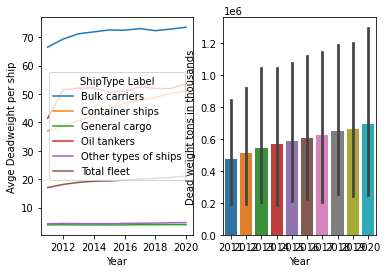

In [11]:
fig, ax = plt.subplots(1,2)

plt.subplot(1,2,1)
sns.lineplot(data=fleet_shipNo, x= 'Year', y= 'Avge Deadweight per ship', hue= 'ShipType Label')

plt.subplot(1,2,2)
sns.barplot(data=fleet_shipNo, x='Year', y='Dead weight tons in thousands')

<AxesSubplot:xlabel='Year', ylabel='Number of ships'>

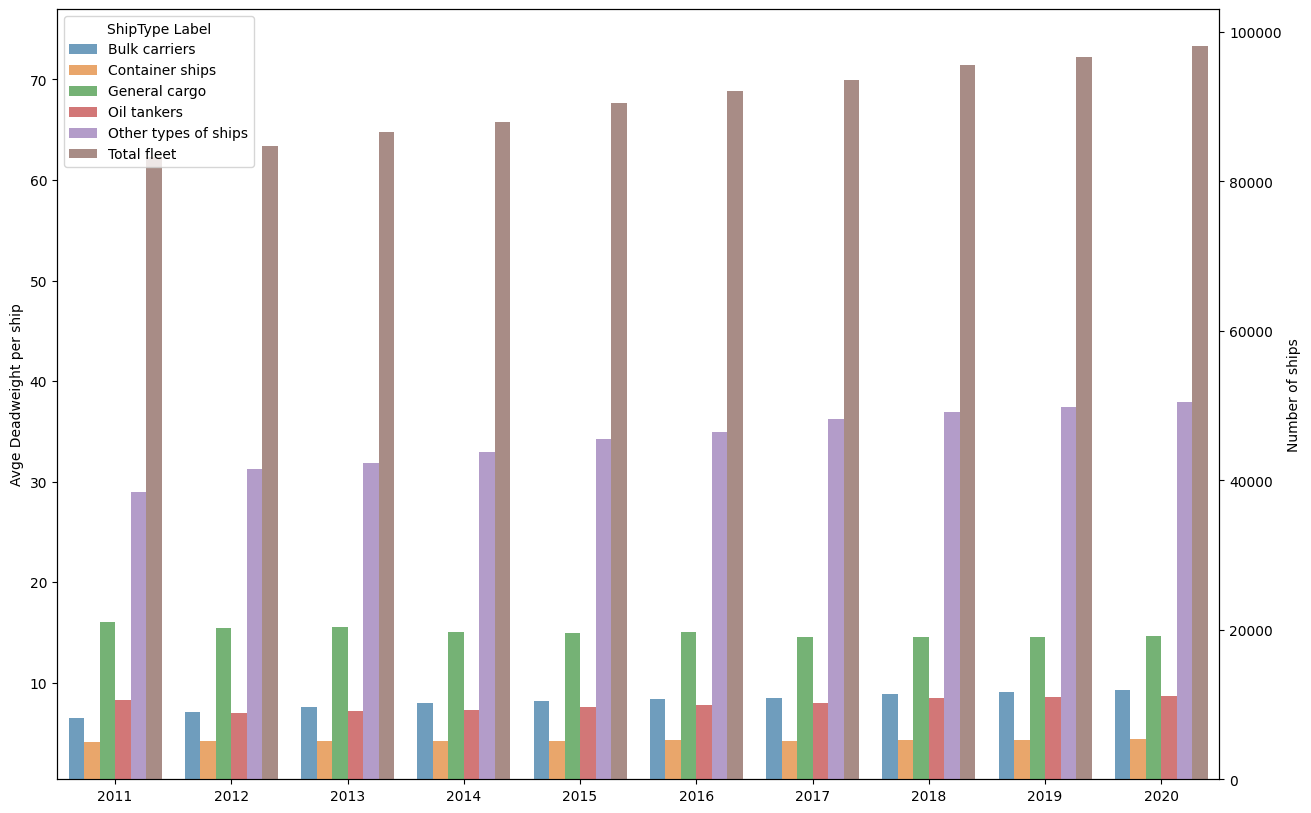

In [12]:
ax1 = sns.set_style(style=None, rc=None )

matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize= (15, 10))

sns.lineplot(data = fleet_shipNo['Avge Deadweight per ship'], ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = fleet_shipNo, x='Year', y='Number of ships', hue='ShipType Label', alpha=0.7, ax=ax2)

In [13]:
fig, ax1 = plt.subplots(figsize= (15, 10))

sns.lineplot(data = Brent_yearly['Price'], ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = BDI_yearly,x= 'Year', ax=ax2)

NameError: name 'Brent_yearly' is not defined

C:\Users\jarai\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Number of ships'>

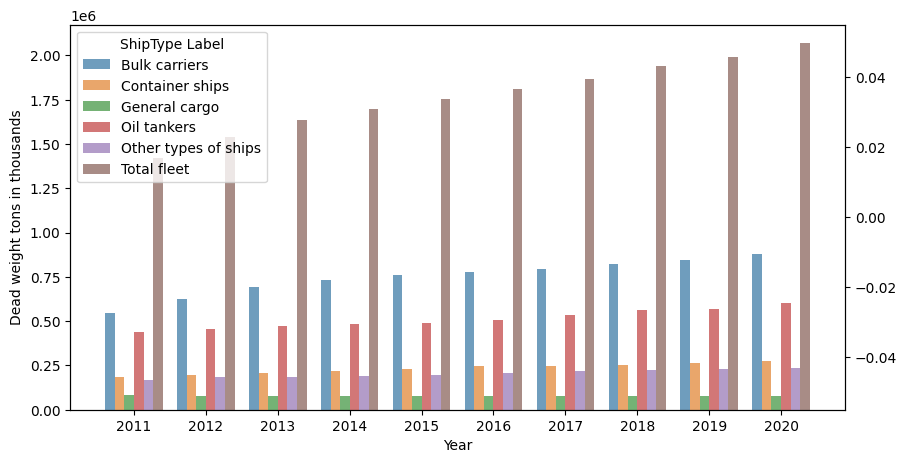

In [402]:
fig = plt.figure(figsize=(10,5))
ax1= plt.subplot(1,1,1)
sns.barplot(data = fleet_shipNo, x='Year', y='Dead weight tons in thousands', hue= 'ShipType Label',ax= ax1, alpha= 0.7)
ax2 = ax1.twinx()
sns.lineplot(fleet_shipNo['Number of ships'], ax= ax2)

C:\Users\jarai\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\jarai\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Year', ylabel='Avge Deadweight per ship'>

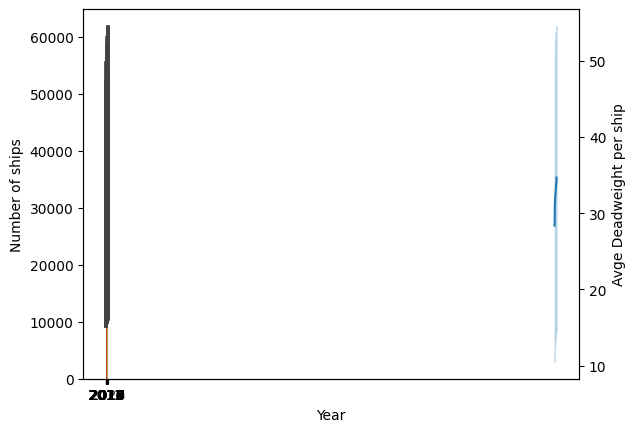

In [161]:

x = fleet_shipNo['Year']
y1= fleet_shipNo['Number of ships']
y2= fleet_shipNo['Avge Deadweight per ship']

fig, ax1 = plt.subplots()
sns.barplot(x,y1, ax= ax1)
ax2= ax1.twinx()
sns.lineplot(x, y2, ax= ax2)

In [134]:
from utils import year_timeseries

In [135]:
Brent = pd.read_csv('./Def_Data/Brent_price.csv')
Brent = Brent.drop(columns=['Unnamed: 0'], axis= 1)
Brent['Date'] = pd.to_datetime(Brent['Date'])
Brent = Brent.set_index(Brent['Date'])
Brent_yearly = Brent.resample('Y').mean()

In [136]:
Brent_yearly.index = pd.to_datetime(Brent_yearly.index)
Brent_yearly = year_timeseries(Brent_yearly)

In [137]:
Brent_yearly = Brent_yearly.loc[1992:]

In [138]:
Brent_yearly = Brent_yearly.rename(columns={'Price': 'Brent price'})


In [139]:
Brent_yearly

,Brent price
1992,19.319728
1993,17.013413
1994,15.856389
1995,17.015850
1996,20.639803
1997,19.108508
1998,12.758103
1999,17.901566
2000,28.660672
2001,24.455720


In [140]:
BDI_yearly = pd.read_csv('./Def_Data/BDI_yearly.csv')

In [141]:
BDI_yearly['Date'] = pd.to_datetime(BDI_yearly['Date'])
BDI_yearly = BDI_yearly.set_index(BDI_yearly['Date'], drop= True)
BDI_yearly = BDI_yearly.rename(columns={'Date':'Fecha', 'Price':'TCE Price'})
BDI_yearly = BDI_yearly.drop(columns= ['Fecha'], axis=1)
BDI_yearly = year_timeseries(BDI_yearly)


In [142]:
Brent_Bdi = pd.concat([Brent_yearly, BDI_yearly],axis= 1)

In [143]:
Brent_Bdi

,Brent price,TCE Price
1992,19.319728,1235.363636
1993,17.013413,1399.300395
1994,15.856389,1477.567460
1995,17.015850,1980.753968
1996,20.639803,1313.837945
1997,19.108508,1335.608696
1998,12.758103,945.234127
1999,17.901566,1063.044000
2000,28.660672,1607.801587
2001,24.455720,1216.601594


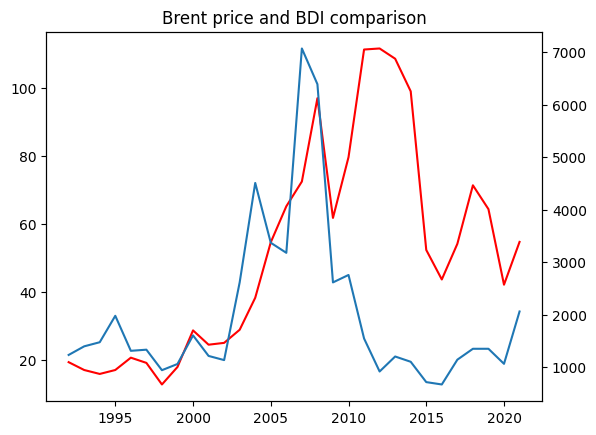

In [152]:

x = Brent_Bdi.index
y1 = Brent_Bdi['Brent price']
y2 = Brent_Bdi['TCE Price']

fig, ax1= plt.subplots()
ax1.plot(x, y1, label= 'Brent price', color= 'r')
ax2 = ax1.twinx()
ax2.plot(x, y2)
plt.title('Brent price and BDI comparison')
plt.show()

In [362]:
fig, ax = plt.subplots(1,2)
figsize = (100, 80)
plt.subplot(1,2,1)
sns.lineplot(Data=Brent_yearly, x= Brent_yearly.index, y= Brent_yearly['Price'])

plt.subplot(1,2,2)
sns.lineplot(data=BDI_yearly, x= BDI_yearly.index, y= BDI_yearly['Price'])

C:\Users\jarai\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\relational.py:436: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



ValueError: not enough values to unpack (expected 2, got 1)

In [318]:
Brent_comparable = Brent.iloc[1992:,:]
Brent_comparable

,Date,Price
Date,,
1995-03-13,1995-03-13,16.30
1995-03-14,1995-03-14,16.33
1995-03-15,1995-03-15,16.38
1995-03-16,1995-03-16,16.50
1995-03-17,1995-03-17,16.55
...,...,...
2021-01-19,2021-01-19,55.38
2021-01-20,2021-01-20,55.66
2021-01-21,2021-01-21,55.68


In [319]:
BDI_yearly.index = pd.to_datetime(BDI_yearly.index)
BDI_yearly

,Date,Price
Date,,
1992-12-31,1992-12-31,1235.363636
1993-12-31,1993-12-31,1399.300395
1994-12-31,1994-12-31,1477.567460
1995-12-31,1995-12-31,1980.753968
1996-12-31,1996-12-31,1313.837945
1997-12-31,1997-12-31,1335.608696
1998-12-31,1998-12-31,945.234127
1999-12-31,1999-12-31,1063.044000
2000-12-31,2000-12-31,1607.801587


<AxesSubplot:xlabel='Date', ylabel='Price'>

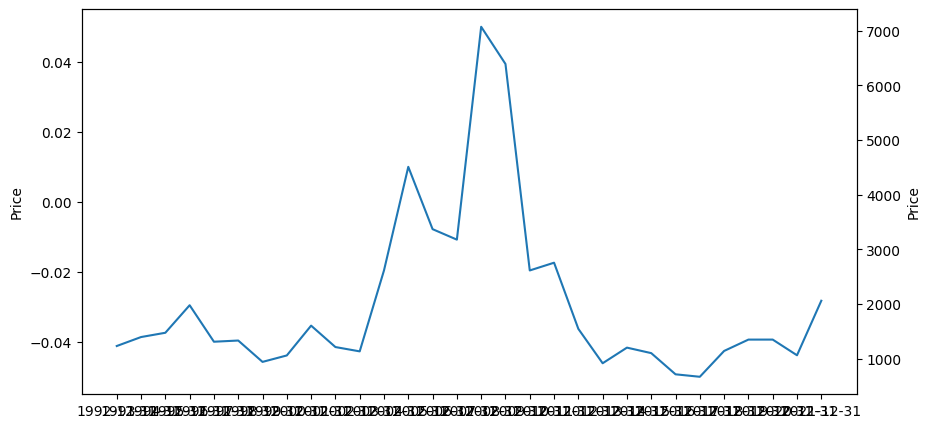

In [296]:
fig = plt.figure(figsize=(10,5))
ax1= plt.subplot(1,1,1)
sns.lineplot(data = Brent_yearly, y= 'Price' )
ax2 = ax1.twinx()
sns.lineplot(data= BDI_yearly, x= 'Date', y= 'Price')

<AxesSubplot:xlabel='Year', ylabel='Dead weight tons in thousands'>

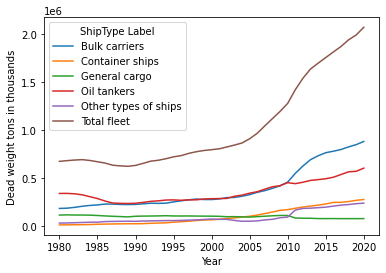

In [218]:
sns.lineplot(data=fleet, x='Year', y= 'Dead weight tons in thousands', hue='ShipType Label')

In [102]:
Global_gdpr = pd.read_csv('./Def_Data/df_globalgdpr.csv')

In [103]:
Global_gdpr

,Unnamed: 0,Period Label,Annual average growth rate per capita,Annual average growth rate
0,0,1971,2.29020,4.37300
1,1,1972,3.36798,5.44756
2,2,1973,4.34527,6.40767
3,3,1974,0.21898,2.16068
4,4,1975,-1.11237,0.75592
5,5,1976,3.38993,5.29551
6,6,1977,2.28837,4.13254
7,7,1978,2.41505,4.23203
8,8,1979,2.24426,4.04878
9,9,1980,0.10961,1.88179


In [104]:
port_calls = pd.read_csv('./Def_Data/df_port_calls.csv')

In [105]:
port_calls

,Unnamed: 0,Year,Economy Label,CommercialMarket Label,Number of port calls
0,0,2018,"""World""","""All ships""",4112944
1,1,2018,"""World""","""Liquid bulk carriers""",494120
2,2,2018,"""World""","""Container ships""",454016
3,3,2018,"""World""","""Dry breakbulk carriers""",430344
4,4,2018,"""World""","""Dry bulk carriers""",259551
5,5,2018,"""World""","""Liquefied petroleum gas carriers""",49357
6,6,2018,"""World""","""Liquefied natural gas carriers""",10617
7,7,2019,"""World""","""All ships""",4362737
8,8,2019,"""World""","""Liquid bulk carriers""",526202
9,9,2019,"""World""","""Container ships""",474553


In [106]:
sea_trade = pd.read_csv('./Def_Data/df_sea_trade.csv')

In [107]:
sea_trade

,Unnamed: 0,YEAR,"""Crude oil loaded""","""Other tanker trade loaded""","""Dry cargo loaded""","""Total goods loaded""","""Crude oil unloaded""","""Other tanker trade unloaded"""
0,0,1970-01-01,1207.000,233.0000,1165.000,2605.000,1101.000,298.0000
1,1,1971-01-01,1210.000,320.0000,1162.000,2692.000,1199.000,300.0000
2,2,1972-01-01,1321.000,332.0000,1221.000,2874.000,1325.000,316.0000
3,3,1973-01-01,1514.000,353.0000,1407.000,3274.000,1521.000,339.0000
4,4,1974-01-01,1497.000,335.0000,1472.000,3304.000,1470.000,312.0000
5,5,1975-01-01,1364.000,280.0000,1428.000,3072.000,1373.000,287.0000
6,6,1976-01-01,1555.000,289.0000,1522.000,3366.000,1522.000,312.0000
7,7,1977-01-01,1599.000,293.0000,1576.000,3468.000,1585.000,321.0000
8,8,1978-01-01,1604.000,296.0000,1650.000,3550.000,1634.000,321.0000
9,9,1979-01-01,1725.000,318.0000,1785.000,3828.000,1724.000,308.0000


In [108]:
trade_volume = pd.read_csv('./Def_Data/df_trade_volume.csv')

In [109]:
seatrade_gdpr = sea_trade.merge(Global_gdpr, how='left')

In [110]:
seatrade_gdpr

,Unnamed: 0,YEAR,"""Crude oil loaded""","""Other tanker trade loaded""","""Dry cargo loaded""","""Total goods loaded""","""Crude oil unloaded""","""Other tanker trade unloaded""",Period Label,Annual average growth rate per capita,Annual average growth rate
0,0,1970-01-01,1207.000,233.0000,1165.000,2605.000,1101.000,298.0000,1971,2.29020,4.37300
1,1,1971-01-01,1210.000,320.0000,1162.000,2692.000,1199.000,300.0000,1972,3.36798,5.44756
2,2,1972-01-01,1321.000,332.0000,1221.000,2874.000,1325.000,316.0000,1973,4.34527,6.40767
3,3,1973-01-01,1514.000,353.0000,1407.000,3274.000,1521.000,339.0000,1974,0.21898,2.16068
4,4,1974-01-01,1497.000,335.0000,1472.000,3304.000,1470.000,312.0000,1975,-1.11237,0.75592
5,5,1975-01-01,1364.000,280.0000,1428.000,3072.000,1373.000,287.0000,1976,3.38993,5.29551
6,6,1976-01-01,1555.000,289.0000,1522.000,3366.000,1522.000,312.0000,1977,2.28837,4.13254
7,7,1977-01-01,1599.000,293.0000,1576.000,3468.000,1585.000,321.0000,1978,2.41505,4.23203
8,8,1978-01-01,1604.000,296.0000,1650.000,3550.000,1634.000,321.0000,1979,2.24426,4.04878
9,9,1979-01-01,1725.000,318.0000,1785.000,3828.000,1724.000,308.0000,1980,0.10961,1.88179


In [111]:
# Para poder comparar el volumen de transporte marítimo anual con el crecimiento del PIB mundial, tenemos que pasar las columnas a porcentages de crecimiento

In [112]:
load_crude_oil = [x for x in seatrade_gdpr['"Crude oil loaded"']]

In [113]:
crude_oil_growth = [(x-load_crude_oil[i-1])/load_crude_oil[i-1] * 100 for i,x in enumerate(load_crude_oil)]

In [114]:
crude_oil_growth

[-35.11303878487741,
 0.24855012427506215,
 9.173553719008265,
 14.610143830431491,
 -1.1228533685601056,
 -8.884435537742151,
 14.002932551319647,
 2.829581993569132,
 0.31269543464665417,
 7.543640897755612,
 -11.478260869565217,
 -10.674525212835626,
 -14.736070381231672,
 -8.082545141874462,
 0.9354536950420954,
 -2.7803521779425395,
 7.340324118207817,
 -1.6873889875666075,
 4.787714543812105,
 8.620689655172415,
 2.142857142857143,
 3.5742035742035743,
 4.576144036009002,
 3.5150645624103296,
 3.8115038115038113,
 2.2696929238985315,
 3.7859007832898173,
 2.2641509433962264,
 -4.797047970479705,
 0.32299741602067183,
 3.34835801674179,
 4.548286604361371,
 -2.443384982121573,
 3.2376298106292003,
 4.733727810650888,
 4.915254237288136,
 -3.9625740441572446,
 1.6973054504980605,
 -1.5899122504734842,
 -4.185788265561962,
 4.3536227172177355,
 -1.8833996790302825,
 1.9671258568767997,
 -2.674489267261295,
 -1.494699235875081,
 2.865570564017895,
 4.061221603736135,
 2.3093350885436

In [115]:
other_tanker_trade_loaded = [x for x in seatrade_gdpr['"Other tanker trade loaded"']]

In [116]:
other_tanker_growth = [(x-other_tanker_trade_loaded[i-1])/other_tanker_trade_loaded[i-1] * 100 for i,x in enumerate(other_tanker_trade_loaded)]

In [117]:
Dry_cargo_loaded = [x for x in seatrade_gdpr['"Dry cargo loaded"']]

In [118]:
Dry_cargo_growth = [(x-Dry_cargo_loaded[i-1])/Dry_cargo_loaded[i-1] * 100 for i,x in enumerate(Dry_cargo_loaded)]

In [119]:
len(Dry_cargo_growth)

50

In [120]:
total_loaded = [x for x in seatrade_gdpr['"Total goods loaded"']]

In [121]:
total_cargo_growth = [[(x-total_loaded[i-1])/100 for i,x in enumerate(total_loaded)]]

In [122]:
len(total_cargo_growth)

1

In [123]:
anual_GDP_growth = [x for x in seatrade_gdpr['Annual average growth rate']]

In [124]:
len(anual_GDP_growth)

50

In [125]:
year = [x for x in seatrade_gdpr['YEAR']]

In [126]:
len(year)

50

In [127]:
trade_GDP_Growth = pd.DataFrame({'Year': year, 'Crude oil': crude_oil_growth, 'Other tanker' : other_tanker_growth , 'Dry cargo': Dry_cargo_growth,  'GDP': anual_GDP_growth})

In [128]:
#Borramos la primera línea ya que no representa la realidad

In [129]:
trade_GDP_Growth = trade_GDP_Growth.drop([0])

In [130]:
trade_GDP_Growth

,Year,Crude oil,Other tanker,Dry cargo,GDP
1,1971-01-01,0.248550,37.339056,-0.257511,5.44756
2,1972-01-01,9.173554,3.750000,5.077453,6.40767
3,1973-01-01,14.610144,6.325301,15.233415,2.16068
4,1974-01-01,-1.122853,-5.099150,4.619758,0.75592
5,1975-01-01,-8.884436,-16.417910,-2.989130,5.29551
6,1976-01-01,14.002933,3.214286,6.582633,4.13254
7,1977-01-01,2.829582,1.384083,3.547963,4.23203
8,1978-01-01,0.312695,1.023891,4.695431,4.04878
9,1979-01-01,7.543641,7.432432,8.181818,1.88179
10,1980-01-01,-11.478261,8.176101,2.689076,1.83546


In [131]:
trade_GDP_Growth.corr()

,Crude oil,Other tanker,Dry cargo,GDP
Crude oil,1.000000,-0.041982,0.272295,0.063121
Other tanker,-0.041982,1.000000,0.052978,0.208678
Dry cargo,0.272295,0.052978,1.000000,0.014144
GDP,0.063121,0.208678,0.014144,1.000000


<AxesSubplot:>

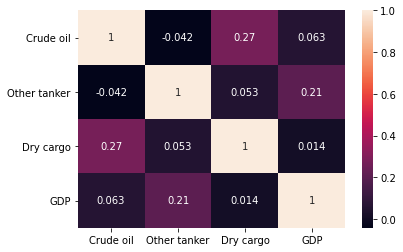

In [132]:
sns.heatmap(trade_GDP_Growth.corr(), annot= True)

In [133]:
# Aunque da una correlación positiva, es mínima, así que voy a comparar con otro dataset que he sacado del PIB total. Comparare con el PIB mundial y el del G20
GDPtotal_world = pd.read_csv('./Def_Data/GDP_world.csv')

In [134]:
trade_GDPtotal_rel = sea_trade.merge(GDPtotal_world, how='left')

In [135]:
trade_GDPtotal_rel

,Unnamed: 0,YEAR,"""Crude oil loaded""","""Other tanker trade loaded""","""Dry cargo loaded""","""Total goods loaded""","""Crude oil unloaded""","""Other tanker trade unloaded""",Year,Series Label,Economy,Economy Label,US dollars at current prices in millions,US dollars at current prices per capita,US dollars at constant prices (2015) in millions,US dollars at constant prices (2015) per capita
0,0,1970-01-01,1207.000,233.0000,1165.000,2605.000,1101.000,298.0000,1970,"""Total gross domestic product""",0,"""World""",3.418983e+06,923.906,1.806763e+07,4881.947
1,1,1971-01-01,1210.000,320.0000,1162.000,2692.000,1199.000,300.0000,1971,"""Total gross domestic product""",0,"""World""",3.762621e+06,996.473,1.885772e+07,4993.754
2,2,1972-01-01,1321.000,332.0000,1221.000,2874.000,1325.000,316.0000,1972,"""Total gross domestic product""",0,"""World""",4.330234e+06,1124.162,1.988501e+07,5161.943
3,3,1973-01-01,1514.000,353.0000,1407.000,3274.000,1521.000,339.0000,1973,"""Total gross domestic product""",0,"""World""",5.268748e+06,1341.349,2.115918e+07,5386.243
4,4,1974-01-01,1497.000,335.0000,1472.000,3304.000,1470.000,312.0000,1974,"""Total gross domestic product""",0,"""World""",5.969122e+06,1490.789,2.161636e+07,5398.038
5,5,1975-01-01,1364.000,280.0000,1428.000,3072.000,1373.000,287.0000,1975,"""Total gross domestic product""",0,"""World""",6.674681e+06,1636.116,2.177976e+07,5337.992
6,6,1976-01-01,1555.000,289.0000,1522.000,3366.000,1522.000,312.0000,1976,"""Total gross domestic product""",0,"""World""",7.212560e+06,1735.971,2.293311e+07,5518.946
7,7,1977-01-01,1599.000,293.0000,1576.000,3468.000,1585.000,321.0000,1977,"""Total gross domestic product""",0,"""World""",8.120307e+06,1919.873,2.388083e+07,5645.240
8,8,1978-01-01,1604.000,296.0000,1650.000,3550.000,1634.000,321.0000,1978,"""Total gross domestic product""",0,"""World""",9.617876e+06,2234.337,2.489147e+07,5781.576
9,9,1979-01-01,1725.000,318.0000,1785.000,3828.000,1724.000,308.0000,1979,"""Total gross domestic product""",0,"""World""",1.107070e+07,2527.261,2.589928e+07,5911.329


In [136]:
trade_GDPtotal_rel = trade_GDPtotal_rel.drop(columns=['Unnamed: 0', 'Year', 'Series Label', 'Economy', 'US dollars at current prices per capita', 'US dollars at constant prices (2015) in millions', 'US dollars at constant prices (2015) per capita'])

In [137]:
correl_GDPworld = trade_GDPtotal_rel.corr()

Text(0.5, 1.0, 'Seaborne and World GDP correlation')

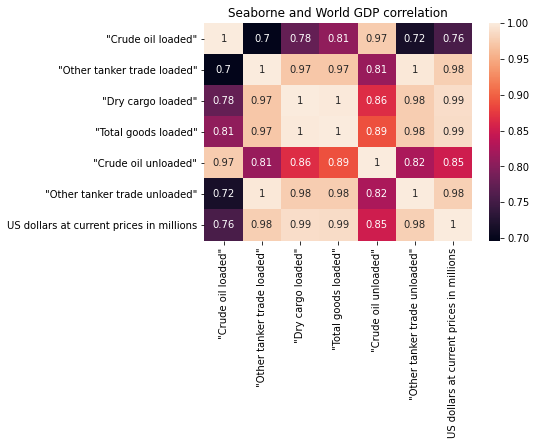

In [138]:
sns.heatmap(correl_GDPworld, annot= True)
plt.title('Seaborne and World GDP correlation')

In [139]:
# This time it´s pretty clear there´s a positive correlation between seaborne trade and GDP. Let´s try now to compare it with G20
dev_seatrade = pd.read_csv('./Def_Data/Dev_countries_Seatrade.csv')
GDP20 = pd.read_csv('./Def_Data/GDP_G20.csv')

In [140]:
dev_seatrade= dev_seatrade.drop(columns='Unnamed: 0', axis=1)

In [141]:
dev_seatrade

,"""Crude oil loaded""","""Crude oil unloaded""","""Dry cargo loaded""","""Dry cargo unloaded""","""Other tanker trade loaded""","""Other tanker trade unloaded""","""Total goods loaded""","""Total goods unloaded""",Year
0,123.00670,1255.7810,1358.5558,2297.8599,332.18322,522.24620,1813.7458,4075.8869,2006.0
1,121.79014,1218.9860,1454.5596,2168.7966,359.01300,506.71970,1935.3633,3894.5019,2007.0
2,112.31863,1223.8302,1462.5501,2176.2633,401.46049,504.64200,1976.3293,3904.7360,2008.0
3,102.01586,1103.8527,1332.0599,1658.4060,379.07170,516.03300,1813.1470,3278.2921,2009.0
4,109.06895,1133.6316,1394.5615,1827.6153,414.21070,526.35530,1917.8416,3487.6025,2010.0
5,102.14281,1058.0704,1459.4616,1896.3261,441.53090,563.96200,2003.1353,3518.3589,2011.0
6,109.63740,1060.7113,1573.2249,1944.2990,439.16750,537.74820,2122.0302,3542.7580,2012.0
7,99.95691,980.1824,1620.3151,2032.8490,435.74040,533.13890,2156.0130,3546.1710,2013.0
8,109.69723,937.0109,1579.8542,2110.2041,425.50880,500.26730,2115.0598,3547.4820,2014.0
9,116.11843,966.6769,1623.1542,2108.3341,428.34510,510.82920,2167.6181,3585.8400,2015.0


In [142]:
GDP20.reset_index(drop=True)
GDP20

,Unnamed: 0,Year,Series Label,Economy,Economy Label,US dollars at current prices in millions,US dollars at current prices per capita,US dollars at constant prices (2015) in millions,US dollars at constant prices (2015) per capita
0,252,1970,"""Total gross domestic product""",3916,"""G20 (Group of Twenty)""",3.093868e+06,1110.284,1.598020e+07,5734.750
1,652,1971,"""Total gross domestic product""",3916,"""G20 (Group of Twenty)""",3.398112e+06,1196.917,1.664554e+07,5863.058
2,1052,1972,"""Total gross domestic product""",3916,"""G20 (Group of Twenty)""",3.917581e+06,1354.714,1.755051e+07,6069.032
3,1452,1973,"""Total gross domestic product""",3916,"""G20 (Group of Twenty)""",4.751364e+06,1613.709,1.870732e+07,6353.581
4,1852,1974,"""Total gross domestic product""",3916,"""G20 (Group of Twenty)""",5.279116e+06,1761.935,1.903206e+07,6352.055
5,2252,1975,"""Total gross domestic product""",3916,"""G20 (Group of Twenty)""",5.909564e+06,1939.594,1.917718e+07,6294.195
6,2652,1976,"""Total gross domestic product""",3916,"""G20 (Group of Twenty)""",6.342082e+06,2048.312,2.015852e+07,6510.629
7,3052,1977,"""Total gross domestic product""",3916,"""G20 (Group of Twenty)""",7.117457e+06,2263.418,2.097882e+07,6671.460
8,3452,1978,"""Total gross domestic product""",3916,"""G20 (Group of Twenty)""",8.472229e+06,2654.005,2.191332e+07,6864.554
9,3852,1979,"""Total gross domestic product""",3916,"""G20 (Group of Twenty)""",9.712336e+06,2997.614,2.280226e+07,7037.686


In [143]:
GDP20 = GDP20.iloc[36:,:]

In [144]:
GDP20 = GDP20.reset_index(drop= True)

In [145]:
GDP20

,Unnamed: 0,Year,Series Label,Economy,Economy Label,US dollars at current prices in millions,US dollars at current prices per capita,US dollars at constant prices (2015) in millions,US dollars at constant prices (2015) per capita
0,15004,2006,"""Total gross domestic product""",3916,"""G20 (Group of Twenty)""",4.562550e+07,10408.369,5.120726e+07,11681.715
1,15428,2007,"""Total gross domestic product""",3916,"""G20 (Group of Twenty)""",5.112797e+07,11558.193,5.330650e+07,12050.680
2,15853,2008,"""Total gross domestic product""",3916,"""G20 (Group of Twenty)""",5.549467e+07,12433.312,5.422184e+07,12148.142
3,16279,2009,"""Total gross domestic product""",3916,"""G20 (Group of Twenty)""",5.274051e+07,11712.410,5.336511e+07,11851.120
4,16705,2010,"""Total gross domestic product""",3916,"""G20 (Group of Twenty)""",5.730461e+07,12616.298,5.565709e+07,12253.578
5,17131,2011,"""Total gross domestic product""",3916,"""G20 (Group of Twenty)""",6.341933e+07,13844.687,5.748053e+07,12548.225
6,17558,2012,"""Total gross domestic product""",3916,"""G20 (Group of Twenty)""",6.432403e+07,13926.285,5.891229e+07,12754.631
7,17986,2013,"""Total gross domestic product""",3916,"""G20 (Group of Twenty)""",6.601443e+07,14177.161,6.050819e+07,12994.649
8,18414,2014,"""Total gross domestic product""",3916,"""G20 (Group of Twenty)""",6.779221e+07,14444.802,6.234962e+07,13285.125
9,18842,2015,"""Total gross domestic product""",3916,"""G20 (Group of Twenty)""",6.437254e+07,13611.686,6.437254e+07,13611.686


In [146]:
dev_sea_rel = dev_seatrade.merge(GDP20, how='left')

In [147]:
dev_sea_rel = dev_sea_rel.drop(columns=['Year', 'Series Label', 'Economy', 'US dollars at current prices per capita', 'US dollars at constant prices (2015) in millions', 'US dollars at constant prices (2015) per capita'])

In [148]:
developed = dev_sea_rel

In [149]:
developed

,"""Crude oil loaded""","""Crude oil unloaded""","""Dry cargo loaded""","""Dry cargo unloaded""","""Other tanker trade loaded""","""Other tanker trade unloaded""","""Total goods loaded""","""Total goods unloaded""",Unnamed: 0,Economy Label,US dollars at current prices in millions
0,123.00670,1255.7810,1358.5558,2297.8599,332.18322,522.24620,1813.7458,4075.8869,15004,"""G20 (Group of Twenty)""",4.562550e+07
1,121.79014,1218.9860,1454.5596,2168.7966,359.01300,506.71970,1935.3633,3894.5019,15428,"""G20 (Group of Twenty)""",5.112797e+07
2,112.31863,1223.8302,1462.5501,2176.2633,401.46049,504.64200,1976.3293,3904.7360,15853,"""G20 (Group of Twenty)""",5.549467e+07
3,102.01586,1103.8527,1332.0599,1658.4060,379.07170,516.03300,1813.1470,3278.2921,16279,"""G20 (Group of Twenty)""",5.274051e+07
4,109.06895,1133.6316,1394.5615,1827.6153,414.21070,526.35530,1917.8416,3487.6025,16705,"""G20 (Group of Twenty)""",5.730461e+07
5,102.14281,1058.0704,1459.4616,1896.3261,441.53090,563.96200,2003.1353,3518.3589,17131,"""G20 (Group of Twenty)""",6.341933e+07
6,109.63740,1060.7113,1573.2249,1944.2990,439.16750,537.74820,2122.0302,3542.7580,17558,"""G20 (Group of Twenty)""",6.432403e+07
7,99.95691,980.1824,1620.3151,2032.8490,435.74040,533.13890,2156.0130,3546.1710,17986,"""G20 (Group of Twenty)""",6.601443e+07
8,109.69723,937.0109,1579.8542,2110.2041,425.50880,500.26730,2115.0598,3547.4820,18414,"""G20 (Group of Twenty)""",6.779221e+07
9,116.11843,966.6769,1623.1542,2108.3341,428.34510,510.82920,2167.6181,3585.8400,18842,"""G20 (Group of Twenty)""",6.437254e+07


In [150]:
dev_sea_rel = dev_sea_rel.drop(columns=['Unnamed: 0', 'Economy Label'], axis=1)

<AxesSubplot:>

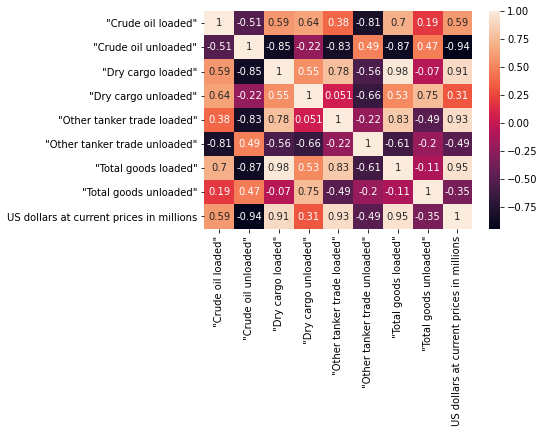

In [151]:
sns.heatmap(dev_sea_rel.corr(), annot= True)

In [152]:
# This other correlation matrix show that when treating with oil trade, there´s less correlation, which suggest developed countries are investing in other sources of energy

In [153]:
year = np.arange(2006,2020,1)

In [154]:
dev_sea_rel['Year'] = year

In [155]:
# Now we are trying to see if oil price is having the same impact in the maritime industry. For that purpose we are using the Brent price index

In [156]:
# First we need to set the price in years instead of days

In [14]:
Brent = pd.read_csv('./Def_Data/Brent_price.csv')
Brent = Brent.drop(columns=['Unnamed: 0'], axis= 1)
Brent['Date'] = pd.to_datetime(Brent['Date'])
Brent = Brent.set_index(Brent['Date'])
Brent_yearly = Brent.resample('Y').mean()

In [15]:
from utils import year_timeseries

In [16]:
Brent_yearly= year_timeseries(Brent_yearly)

In [22]:
BDI_yearly = pd.read_csv('./Def_Data/BDI_yearly.csv')

In [23]:
Brent_Bdi = Brent_yearly.merge(BDI_yearly, how= 'left')

In [170]:
sea_trade['YEAR'] = pd.to_datetime(sea_trade['YEAR'])

In [171]:
comparable_Brent = Brent_yearly.iloc[:-2]

In [175]:
Seatrade_brent = pd.concat([sea_trade, comparable_Brent.reindex(sea_trade.index)], axis=1)

In [183]:
Brent_price = Brent_yearly['Price']

In [187]:
size_diff = sea_trade.index.size - Brent_price.index.size
Brent_price.index = sea_trade.index[size_diff:]

In [188]:
sea_trade_Brent = pd.concat([sea_trade, Brent_price], axis=1)

In [190]:
sea_trade_Brent.drop(columns=['Unnamed: 0', 'YEAR'])

,"""Crude oil loaded""","""Other tanker trade loaded""","""Dry cargo loaded""","""Total goods loaded""","""Crude oil unloaded""","""Other tanker trade unloaded""",Price
0,1207.000,233.0000,1165.000,2605.000,1101.000,298.0000,NaN
1,1210.000,320.0000,1162.000,2692.000,1199.000,300.0000,NaN
2,1321.000,332.0000,1221.000,2874.000,1325.000,316.0000,NaN
3,1514.000,353.0000,1407.000,3274.000,1521.000,339.0000,NaN
4,1497.000,335.0000,1472.000,3304.000,1470.000,312.0000,NaN
5,1364.000,280.0000,1428.000,3072.000,1373.000,287.0000,NaN
6,1555.000,289.0000,1522.000,3366.000,1522.000,312.0000,NaN
7,1599.000,293.0000,1576.000,3468.000,1585.000,321.0000,NaN
8,1604.000,296.0000,1650.000,3550.000,1634.000,321.0000,NaN
9,1725.000,318.0000,1785.000,3828.000,1724.000,308.0000,NaN


Text(0.5, 1.0, 'Correlation between sea trade and Brent oil price')

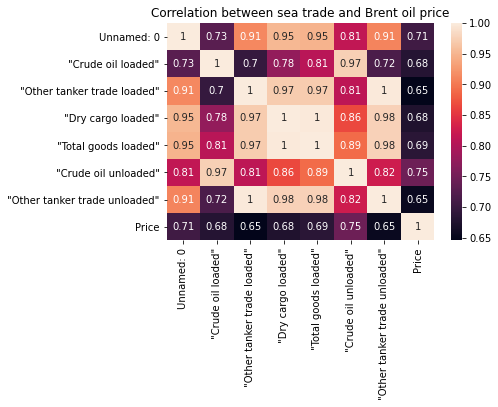

In [193]:
sns.heatmap(sea_trade_Brent.corr(), annot= True)
plt.title("Correlation between sea trade and Brent oil price")

<AxesSubplot:xlabel='Date', ylabel='Price'>

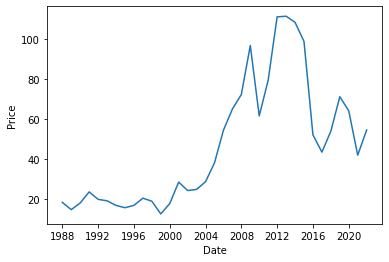

In [224]:
sns.lineplot(data = Brent_yearly, x= Brent_yearly.index, y= 'Price')

In [227]:
BDI_yearly = BDI_yearly.set_index(BDI_yearly['Date'], drop= True)

<AxesSubplot:xlabel='Date', ylabel='Price'>

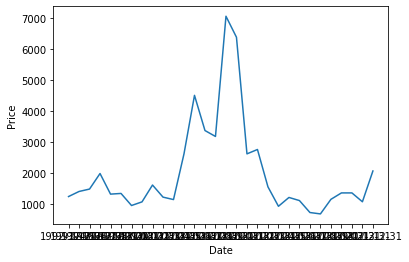

In [228]:
sns.lineplot(data= BDI_yearly, x= 'Date', y= 'Price')

In [219]:
BDI_yearly = pd.read_csv('./Def_Data/BDI_yearly.csv')

NameError: name 'Brent_yearly' is not defined

,Date,Unnamed: 0,Price
0,1987,0,18.63
1,1987,1,18.45
2,1987,2,18.55
3,1987,3,18.60
4,1987,4,18.63
...,...,...,...
8549,2021,8549,55.38
8550,2021,8550,55.66
8551,2021,8551,55.68
8552,2021,8552,55.22


<Figure size 7200x3600 with 0 Axes>

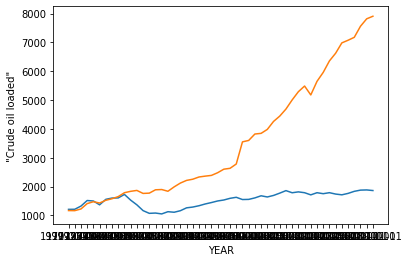

<Figure size 7200x3600 with 0 Axes>

In [202]:

sns.lineplot(data= seatrade_gdpr, x='YEAR', y= '"Crude oil loaded"')
sns.lineplot(data= seatrade_gdpr, x='YEAR', y= '"Dry cargo loaded"')
plt.figure(figsize=(100, 50))

In [165]:
sea_corr = seatrade_gdpr.corr()

In [167]:
trade_volume

,Unnamed: 0,Quarter,Quarter Label,Flow Label,"""Growth rate","""Growth rate.1",Growth rate (over previous period),Volume Index (2005=100)
0,0,2005,Q1,Imports,NaN,NaN,100.0000,100.000
1,1,2005,Q1,Exports,NaN,NaN,100.0000,100.000
2,2,2005,Q2,Imports,NaN,7.67535,107.6753,102.842
3,3,2005,Q2,Exports,NaN,7.72633,107.7263,103.197
4,4,2005,Q3,Imports,NaN,-0.56606,107.0658,104.027
...,...,...,...,...,...,...,...,...
123,123,2020,Q2,Exports,-16.21963,-11.60969,134.7400,131.693
124,124,2020,Q3,Imports,-5.24466,12.92354,154.2230,146.164
125,125,2020,Q3,Exports,-3.53888,15.64311,155.8175,149.821
126,126,2020,Q4,Imports,0.21284,7.18972,165.3112,153.442
